# matplotlib-label-lines example

From https://github.com/cphyc/matplotlib-label-lines.

In [1]:
!pip install matplotlib-label-lines

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import loglaplace, chi2

from labellines import labelLine, labelLines

In [3]:
X = np.linspace(0, 1, 500)
A = [1, 2, 5, 10, 20]
funcs = [np.arctan, np.sin, loglaplace(4).pdf, chi2(5).pdf]

[Text(0.17, 0.168390066359902, '1'),
 Text(0.335, 0.5903060408009769, '2'),
 Text(0.5, 1.190288755848347, '5'),
 Text(0.665, 1.4215385518686854, '10'),
 Text(0.8300000000000001, 1.5106280265233845, '20')]

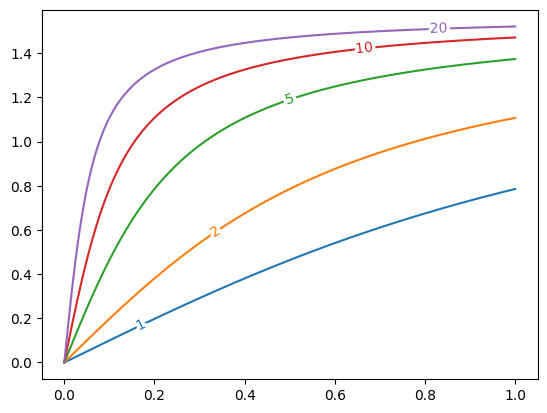

In [4]:
for a in A:
    plt.plot(X, np.arctan(a * X), label=str(a))

labelLines(plt.gca().get_lines(), zorder=2.5)

[Text(0.17, 0.16918230125531397, '1'),
 Text(0.335, 0.6209852990638817, '2'),
 Text(0.5, 0.5984646332042476, '5'),
 Text(0.665, 0.35863404718913355, '10'),
 Text(0.8300000000000001, -0.7782632450929946, '20')]

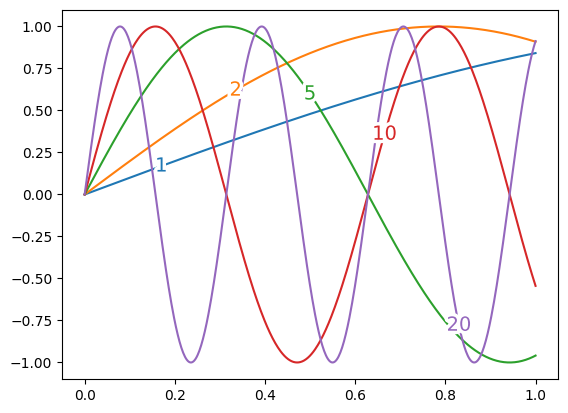

In [5]:
for a in A:
    plt.plot(X, np.sin(a * X), label=str(a))

labelLines(plt.gca().get_lines(), align=False, fontsize=14)

[Text(0.8, 1.0240030858702156, '1'),
 Text(0.55, 1.2419038028263016, '2'),
 Text(0.22, 1.2421110872188392, '5'),
 Text(0.104, 1.644738848565175, '10'),
 Text(0.045, 1.4601539736756004, '20')]

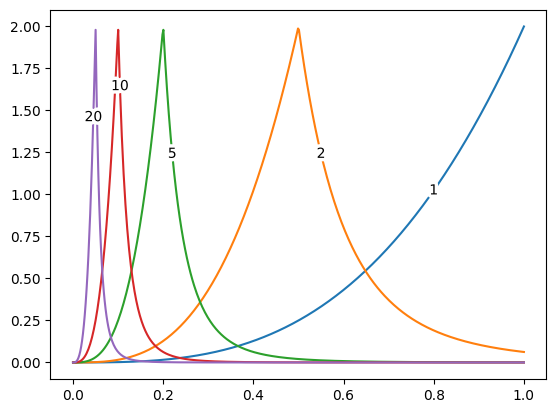

In [6]:
for a in A:
    plt.plot(X, loglaplace(4).pdf(a * X), label=str(a))

xvals = [0.8, 0.55, 0.22, 0.104, 0.045]
labelLines(plt.gca().get_lines(), align=False, xvals=xvals, color="k")

[Text(0.203, 0.010988894115560295, '1'),
 Text(0.401, 0.06395848007753831, '2'),
 Text(0.5990000000000001, 0.154179892582193, '5'),
 Text(0.797, 0.055630648553157164, '10')]

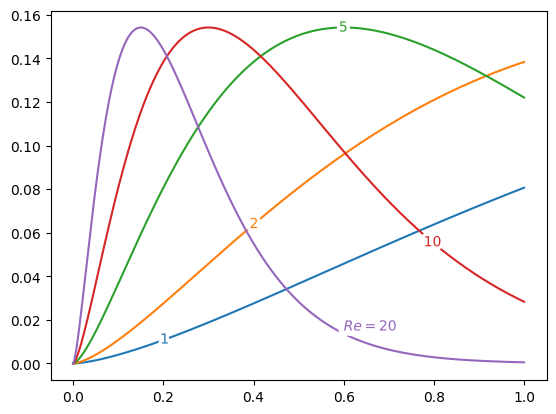

In [7]:
for a in A:
    plt.plot(X, chi2(5).pdf(a * X), label=str(a))

lines = plt.gca().get_lines()
l1 = lines[-1]
labelLine(l1, 0.6, label=rf"$Re=${l1.get_label()}", ha="left", va="bottom", align=False)
labelLines(lines[:-1], align=False)

[Text(0.11332707386864113, 0.5155172499526048, '1'),
 Text(0.1845005175411424, 1.0741105454378195, '2'),
 Text(0.30037342190980854, 1.4384070821961075, '5'),
 Text(0.4890186422901957, 1.5299208570751022, '10'),
 Text(0.796139788223844, 1.558236363230622, '20')]

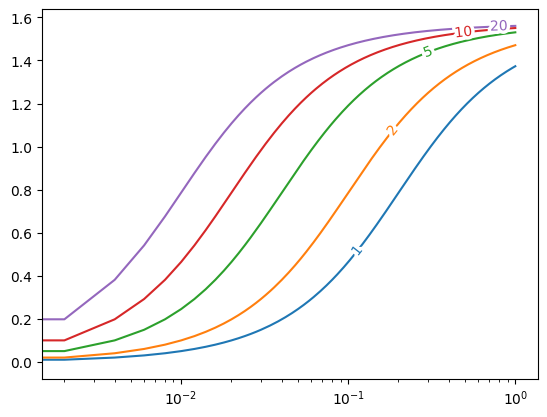

In [8]:
for a in A:
    plt.semilogx(X, np.arctan(5 * a * X), label=str(a))

labelLines(plt.gca().get_lines(), zorder=2.5)

[Text(0.14677992676220694, 0.006948961943773446, '1'),
 Text(0.21544346900318834, 0.030322751011456425, '2'),
 Text(0.31622776601683794, 0.11992299878147598, '5'),
 Text(0.46415888336127786, 0.13058094540506895, '10'),
 Text(0.6812920690579611, 0.007353966688069523, '20')]

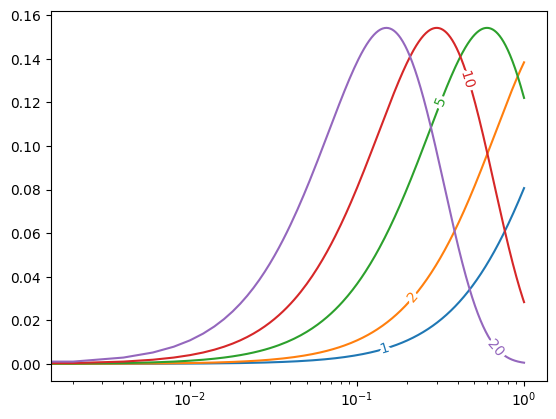

In [9]:
for a in A:
    plt.semilogx(X, chi2(5).pdf(a * X), label=str(a))

labelLines(plt.gca().get_lines(), xvals=(0.1, 1), zorder=2.5)

/tmp/ipykernel_201219/3904205330.py:6: RuntimeWarning: divide by zero encountered in power
  plt.plot(X, X**(-2)/i, label='$x^2/%s$' % i)


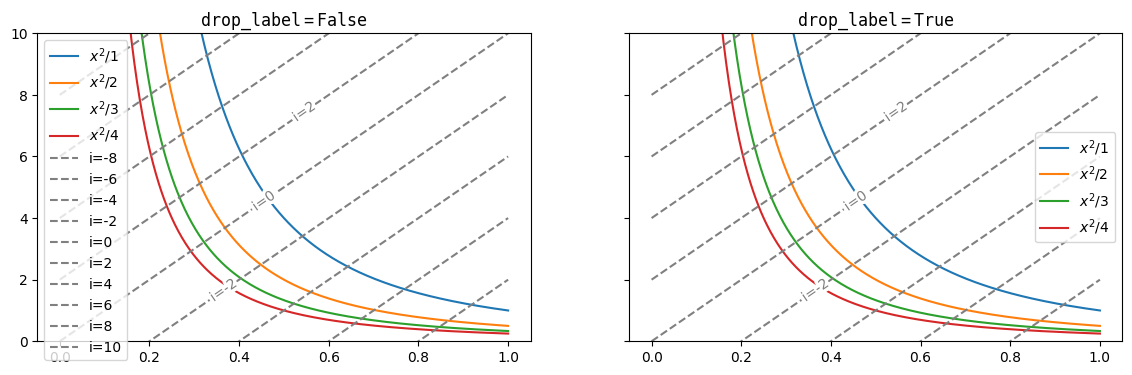

In [10]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14, 4))

for j, ax in enumerate(axes):
    fig.sca(ax)
    for i in range(1, 5):
        plt.plot(X, X ** (-2) / i, label="$x^2/%s$" % i)
    plt.ylim(0, 10)

    lines = []
    for i in range(-8, 12, 2):
        lines.extend(plt.plot(X, 10 * X + i, "--", color="gray", label="i=%s" % i))

    if j == 0:
        labelLines(lines, zorder=2.5)
        plt.title("$\mathtt{drop\_label=False}$")
    else:
        labelLines(lines, zorder=2.5, drop_label=True)
        plt.title("$\mathtt{drop\_label=True}$")
    plt.legend()